In [1]:
import pandas as pd
from sklearn.datasets import load_boston
import statsmodels.formula.api as smf
dataset=load_boston()


## 一、观察数据，进行多元回归。

In [2]:
print(dir(dataset))#输出变量的参数信息
print(dataset.DESCR)

['DESCR', 'data', 'feature_names', 'filename', 'target']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-

In [3]:
data=pd.DataFrame(dataset.data,columns=dataset.feature_names)
data['MEDV']=dataset.target

In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
res=smf.ols('MEDV~RM',data=data)
res=res.fit()
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
res=smf.ols('MEDV~RM+AGE+RM:AGE',data=data).fit()#var1:var2代表interaction term
print(res.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -59.5929      7.787     -7.653      0.000     -74.892     -44.294
RM            13.7475      1.202     11.438      0.000      11.386      16.109
AGE            0.3815      0.097      3.944      0.000       0.191       0.572
RM:AGE        -0.0714      0.015     -4.722      0.000      -0.101      -0.042


In [7]:
res=smf.ols('MEDV~RM*AGE+I(RM**2)',data=data).fit()#与上文等价,I表示“保护”
print(res.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.0053     15.985      4.692      0.000      43.600     106.411
RM           -24.6709      4.224     -5.841      0.000     -32.970     -16.372
AGE            0.0725      0.095      0.763      0.446      -0.114       0.259
RM:AGE        -0.0252      0.015     -1.702      0.089      -0.054       0.004
I(RM ** 2)     2.7089      0.287      9.426      0.000       2.144       3.274


In [8]:
all_columns="+".join(dataset.feature_names)
y = data['MEDV']
x = data.iloc[:, :-1]
print(res.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.0053     15.985      4.692      0.000      43.600     106.411
RM           -24.6709      4.224     -5.841      0.000     -32.970     -16.372
AGE            0.0725      0.095      0.763      0.446      -0.114       0.259
RM:AGE        -0.0252      0.015     -1.702      0.089      -0.054       0.004
I(RM ** 2)     2.7089      0.287      9.426      0.000       2.144       3.274


In [9]:
res = smf.ols('MEDV~'+all_columns+'-AGE', data=data).fit()
print(res.summary().tables[1])


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.000      26.456      46.418
CRIM          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
ZN             0.0463      0.014      3.404      0.001       0.020       0.073
INDUS          0.0206      0.061      0.335      0.738      -0.100       0.141
CHAS           2.6890      0.860      3.128      0.002       1.000       4.378
NOX          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
RM             3.8144      0.408      9.338      0.000       3.012       4.617
DIS           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
RAD            0.3058      0.066      4.627      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
PTRATIO       -0.9522      0.130     -7.308      0.0

# 二、计算测试误差（重采样）

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

## 1、验证集法

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(dataset.data,dataset.target,test_size=0.3,random_state=0)#训练集、验证集
model=LinearRegression()#生成该类的一个实例model
model.fit(xtrain,ytrain)

LinearRegression()

In [12]:
model.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

In [13]:
print(model.score(xtest,ytest))#输出测试集的R2
pred=model.predict(xtest)
print(mean_squared_error(ytest,pred))#计算MSE
print(r2_score(ytest,pred))#计算测试集R2

0.6733825506400184
27.195965766883308
0.6733825506400184


## 2、K折交叉验证和重复……

In [14]:
from sklearn.model_selection import KFold,LeaveOneOut,RepeatedKFold,cross_val_score

In [15]:
print(data.columns)
y=data['MEDV']
x=data.iloc[:,:-1]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [16]:
model=LinearRegression()
kfold=KFold(n_splits=10,shuffle=True,random_state=1)#shuffle表示“洗牌”，即随机分组
scores=cross_val_score(model,x,y,cv=kfold)
print(scores)

[0.77863866 0.76632537 0.8729179  0.44002779 0.84715141 0.71692423
 0.72093063 0.59299064 0.69816152 0.75603868]


In [17]:
scores_mse=-cross_val_score(model,x,y,cv=kfold,scoring='neg_mean_squared_error')#输出结果为负的MSE,sklearn模块默认进行最大化，故需引入负号
scores_mse

array([20.54427466, 24.47650033,  9.49619045, 48.63290854, 12.11906454,
       18.14673907, 17.53359386, 38.67822303, 34.22829546, 13.73556966])

In [18]:
scores.mean()

0.7190106820189466

In [19]:
scores_mse.mean()#测试误差

23.75913596007323

In [20]:
rkfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=1)
scores_mse10=-cross_val_score(model,x,y,cv=rkfold,scoring='neg_mean_squared_error')
scores_mse10.mean()

23.962356681713356

绘制100个子样本MSE的直方图和核密度图

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/singal/miniforge3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

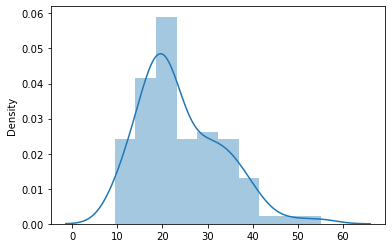

In [22]:
sns.distplot(scores_mse10)#distplot既画核密度，又画直方图，对应函数dataframe.plot.density and dataframe.hist

## 3、留一交叉验证

In [23]:
loo=LeaveOneOut()#LOOCV为确定性过程，故无需设定参数
scores_mse_loo=-cross_val_score(model,x,y,cv=loo,scoring='neg_mean_squared_error')
scores_mse_loo.mean()

23.72574551947616